<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_HR_gr1/blob/main/Novikov%20Ivan/%22Novikov_Ivan_pynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #Библиотека работы с массивами
import pandas as pd # Библиотека для работы с базами

from tensorflow.keras.models import Sequential, Model #
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten #
from tensorflow.keras import utils #Используем для to_categoricall
from tensorflow.keras.optimizers import Adam,Adadelta,SGD,Adagrad,RMSprop #
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence #
from tensorflow.keras.preprocessing.sequence import pad_sequences #
from tensorflow.keras.callbacks import LambdaCallback # подключаем колбэки

from sklearn.preprocessing import StandardScaler #
from sklearn.model_selection import train_test_split # Для разбивки на выборки
from sklearn.metrics import mean_squared_error, mean_absolute_error #

import random #Для генерации случайных чисел
import math # Для округления
#import os #Для работы с файлами
import re #
import matplotlib.pyplot as plt #
%matplotlib inline
import gdown
from IPython.display import clear_output
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import utils
from sklearn.preprocessing import LabelEncoder


# Новый раздел

In [ ]:
gdown.download('https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_HR/datasets/%D0%94%D0%B0%D1%82%D0%B0%D0%A1%D0%B5%D1%82%20%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0%20%D1%80%D0%B5%D0%B7%D1%8E%D0%BC%D0%B5%20581%20%D1%80%D0%B5%D0%B7%D1%8E%D0%BC%D0%B5.xlsx','dataS.xlsx', quiet=True)


'dataS.xlsx'

### Исследование датасета

In [ ]:
data = pd.read_excel('dataS.xlsx', index_col=0) #Загружаем данные в data frame
data.head()

,Дата отклика,ФИО,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
0,2023-02-23 00:00:00,Bessonova Mariya,Женщина,90 000 руб.,Growth Product Manager,"Индонезия, Не готова к переезду, не готова к к...","проектная работа, частичная занятость, полная ...",удаленная работа,Опыт работы —5 лет 10 месяцев,PT MYBALI APP GROUP,Менеджер по продукту,"Высшее, 2023, Нетоло́гия, 2014, Университет Ро...",23 февраля 2023 в 16:30,да
1,2023-01-11 00:00:00,Ефремова Екатерина Вячеславовна,Женщина,не указана,Growth Product Manager,"Москва, Готова к переезду, готова к командировкам",полная занятость,"удаленная работа, гибкий график, полный день",Опыт работы —11 лет 11 месяцев,Банк Открытие,Product owner трайб сбережения и инвестиции,"Высшее, 2022, GeekBrains, 2010, Московский худ...",8 февраля 2023 в 09:15,да
2,2023-02-27 00:00:00,Фролов Артур Михайлович,"Мужчина, 33 года, родился 23 августа 1989",150 000 руб.,Growth Product Manager,"Санкт-Петербург, Готов к переезду: Москва, гот...","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —7 лет 2 месяца,DIKIY LLC,Директор по маркетингу и бренд-менеджер,"Высшее, 2013, Санкт-Петербургский государствен...",28 февраля 2023 в 09:41,да
3,2023-01-11 00:00:00,Хозаев Расул Шагаманович,"Мужчина, 32 года, родился 7 декабря 1990",не указана,Growth Product Manager,"Москва, м. Молодежная, Хочу переехать, готов к...","стажировка, частичная занятость, полная занятость","удаленная работа, гибкий график, полный день",Опыт работы —8 лет 10 месяцев,WeInvest,Product Manager (team leader),"Магистр, 2014, Московский государственный техн...",24 января 2023 в 12:07,да
4,2023-01-11 00:00:00,Шадрин Олег Михайлович,"Мужчина, 26 лет, родился 21 февраля 1996",150 000 руб.,Growth Product Manager,"Пермь, Хочу переехать, готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —5 лет 9 месяцев,Индивидуальное предпринимательство / частная п...,Product/Project manager,"Высшее, 2021, Российская академия народного хо...",6 февраля 2023 в 11:18,да


# Разбор столбцов


In [ ]:
# Вывод информации из столбца
column_data = data['Пол, возраст']
print(column_data)
# Подсчет пустых значений в столбце
count_empty = data['Пол, возраст'].isnull().sum()
print(count_empty)
# Подсчет уникальных значений в столбце
unique_values = data['Пол, возраст'].nunique()
print(unique_values)

# Получение уникальных значений в столбце
unique_values = data['Пол, возраст'].unique()

# Вывод уникальных значений
for value in unique_values:
    print(value)

0                                        Женщина
1                                        Женщина
2      Мужчина, 33 года, родился 23 августа 1989
3       Мужчина, 32 года, родился 7 декабря 1990
4       Мужчина, 26 лет, родился 21 февраля 1996
                         ...                    
577        Мужчина, 24 года, родился 16 мая 1998
578      Мужчина, 42 года, родился 27 марта 1980
579     Мужчина, 39 лет, родился 19 октября 1983
580       Женщина, 38 лет, родилась 14 июля 1984
581      Женщина, 29 лет, родилась 21 марта 1993
Name: Пол, возраст, Length: 579, dtype: object
0
443
Женщина
Мужчина, 33 года, родился 23 августа 1989
Мужчина, 32 года, родился 7 декабря 1990
Мужчина, 26 лет, родился 21 февраля 1996
Женщина, 31 год, родилась 26 июня 1991
Женщина, 36 лет, родилась 20 марта 1987
Женщина, 24 года, родилась 27 апреля 1998
Женщина, 31 год, родилась 16 июля 1991
Женщина, 28 лет, родилась 5 декабря 1994
Мужчина, 36 лет, родился 22 октября 1986
Мужчина, 28 лет, родился 18 октябр

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 581
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Дата отклика                     579 non-null    object
 1   ФИО                              579 non-null    object
 2   Пол, возраст                     579 non-null    object
 3   ЗП                               579 non-null    object
 4   Ищет работу на должность         579 non-null    object
 5   Город                            579 non-null    object
 6   Занятость                        579 non-null    object
 7   График                           579 non-null    object
 8   Опыт ()                          579 non-null    object
 9   Последнее/нынешное место работы  579 non-null    object
 10  Последняя/нынешняя должность     579 non-null    object
 11  Образование и ВУЗ                579 non-null    object
 12  Обновление резюме                579

In [ ]:
data.describe()
# вывод основных статистических характеристик DataFrame


,Дата отклика,ФИО,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
count,579,579,579,579,579,579,579,579,579,579,579,579,579,500
unique,89,507,443,44,8,209,20,30,252,486,358,488,547,2
top,2023-02-22 00:00:00,ФИО скрыто соискателем,Женщина,не указана,Growth Product Manager,"Уфа, Не готова к переезду, не готова к команди...",полная занятость,полный день,Опыт работы —6 лет 9 месяцев,Индивидуальное предпринимательство / частная п...,Product manager,Среднее образование,31 января 2023 в 09:52,нет
freq,48,7,41,288,198,69,342,202,10,12,42,15,3,489


In [ ]:
data.shape


(579, 14)

In [ ]:
data.size


8106

In [ ]:
data.count()

Дата отклика                       579
ФИО                                579
Пол, возраст                       579
ЗП                                 579
Ищет работу на должность           579
Город                              579
Занятость                          579
График                             579
Опыт ()                            579
Последнее/нынешное место работы    579
Последняя/нынешняя должность       579
Образование и ВУЗ                  579
Обновление резюме                  579
Подходит - да/нет                  500
dtype: int64

In [ ]:
data.isna().sum()

Дата отклика                        0
ФИО                                 0
Пол, возраст                        0
ЗП                                  0
Ищет работу на должность            0
Город                               0
Занятость                           0
График                              0
Опыт ()                             0
Последнее/нынешное место работы     0
Последняя/нынешняя должность        0
Образование и ВУЗ                   0
Обновление резюме                   0
Подходит - да/нет                  79
dtype: int64

In [ ]:
data.isna().sum() / data.shape[0]

Дата отклика                       0.000000
ФИО                                0.000000
Пол, возраст                       0.000000
ЗП                                 0.000000
Ищет работу на должность           0.000000
Город                              0.000000
Занятость                          0.000000
График                             0.000000
Опыт ()                            0.000000
Последнее/нынешное место работы    0.000000
Последняя/нынешняя должность       0.000000
Образование и ВУЗ                  0.000000
Обновление резюме                  0.000000
Подходит - да/нет                  0.136442
dtype: float64

In [ ]:
proc = data.isna().sum().sum() / data.size
print('{:.1%}'.format(proc))

1.0%


In [ ]:
print(data.columns)

Index(['Дата отклика', 'ФИО', 'Пол, возраст', 'ЗП', 'Ищет работу на должность',
       'Город', 'Занятость', 'График', 'Опыт ()',
       'Последнее/нынешное место работы', 'Последняя/нынешняя должность',
       'Образование и ВУЗ', 'Обновление резюме', 'Подходит - да/нет'],
      dtype='object')


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.corr()

<ipython-input-17-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


""


In [ ]:
# Пример данных
n = 0 # Берем первое резюме
for i in range(len(data.values[n])): # Выводим значение каждой графы резюме
  print(i, " ", data.values[n][i])

0   2023-02-23 00:00:00
1   Bessonova Mariya
2   Женщина
3   90 000 руб.
4   Growth Product Manager
5   Индонезия, Не готова к переезду, не готова к командировкам
6   проектная работа, частичная занятость, полная занятость
7   удаленная работа
8   Опыт работы —5 лет 10 месяцев
9   PT MYBALI APP GROUP
10   Менеджер по продукту
11   Высшее, 2023, Нетоло́гия, 2014, Университет Российской академии образования, Москва
12   23 февраля 2023 в 16:30
13   да


In [ ]:
i=0
for j in range(14):  # Для каждого из столбцов таблицы
    for i in range(data.shape[0]): # По всем резюме
        if isinstance(data.values[i][j], str): # если данные текстовые, то заменяем фрагменты кодировки ASCII на отсутствие символов
            data.values[i][j] = data.values[i][j].replace("\xa0","")
            data.values[i][j] = data.values[i][j].replace("\n"," ")


### Получение уникальных значений каждого столбца

In [ ]:
# Получение уникальных значений столбца "Занятость" и их сортировка
unique_employment_values = sorted(set(data["Занятость"]))

# Вывод уникальных значений в одну строку без повторений
unique_values_string = ', '.join(unique_employment_values)
unique_values_string = ', '.join(sorted(set(unique_values_string.split(", "))))

print(unique_values_string)

волонтерство, неполный рабочий день, полная занятость, полный рабочий день, проектная работа, стажировка, частичная занятость


In [ ]:
# Получение уникальных значений столбца "График" и их объединение в одну строку
unique_values = data["График"].unique()
unique_values_string = ', '.join(unique_values)

# Удаление повторяющихся значений
unique_values_string = ', '.join(list(set([value.strip() for value in unique_values_string.split(", ")])))

print(unique_values_string)
#unique_values_string

полный день, удаленная работа, гибкий график, сменный график, вахтовый метод, сменный графи, полный рабочий день, удаленная


In [ ]:
# Получение уникальных значений в столбце "ЗП"
unique_currencies = data['ЗП'].unique()

# Подсчет количества уникальных валют
num_currencies = len(unique_currencies)

# Вывод общего числа валют
print("Общее число валют:", num_currencies)

Общее число валют: 44


In [ ]:
# Получение уникальных значений столбца "ЗП" и их сортировка
currencies = set()

for index, row in data.iterrows():
    salary = str(row['ЗП'])
    currency = ''.join(filter(str.isalpha, salary))
    if len(currency) == 3:
        currencies.add(currency)

print(len(currencies))
print(currencies)

5
{'EUR', 'KZT', 'USD', 'KGS', 'руб'}


In [ ]:
# Получение уникальных значений в столбце "Город"
unique_currencies = data['Город'].unique()

# Подсчет количества уникальных значений
num_currencies = len(unique_currencies)

# Вывод общего числа городов
print("Общее число городов:", num_currencies)

Общее число городов: 209


In [ ]:
cities = data['Город'].unique()  # Получение уникальных значений из столбца 'Города'
cities.sort()  # Сортировка городов

total_cities = len(cities)  # Количество уникальных городов

print("Количество уникальных городов:", total_cities)
print("Уникальные города (отсортированы):")
for city in cities:
    print(city)


Количество уникальных городов: 209
Уникальные города (отсортированы):
Актау, Не готов к переезду, готов к редким командировкам
Алматы, Готов к переезду, готов к командировкам
Алматы, Готов к переезду, готов к редким командировкам
Алматы, Готов к переезду, не готов к командировкам
Алматы, Не готов к переезду, не готов к командировкам
Алматы, м. Алатау, Готова к переезду: Москва, Астана, готова к редким командировкам
Армения, Готов к переезду, готов к командировкам
Армения, Готова к переезду, готова к командировкам
Армения, Не готов к переезду, готов к командировкам
Астана, Готов к переезду, готова к командировкам
Астана, Готова к переезду, готова к командировкам
Астрахань, Готов к переезду: Москва, готов к командировкам
Батуми, Готов к переезду, готов к командировкам
Батуми, Готов к переезду: Санкт-Петербург, готов к редким командировкам
Батуми, Готова к переезду, готова к командировкам
Батуми, Не готов к переезду, не готов к командировкам
Батуми, Хочу переехать: Нидерланды, Португалия,

In [ ]:
unique_cities = set()
for city in cities:
    city_name = city.split(',')[0].split()[0].strip()  # Получаем название города до первого знака или пробела
    unique_cities.add(city_name)  # Добавляем город во множество уникальных городов

sorted_unique_cities = sorted(unique_cities)  # Сортируем уникальные города по алфавиту

print("Количество уникальных городов:", len(sorted_unique_cities))
print("Уникальные города (отсортированы):")
for city in sorted_unique_cities:
    print(city)


Количество уникальных городов: 58
Уникальные города (отсортированы):
Актау
Алматы
Армения
Астана
Астрахань
Батуми
Бишкек
Брянск
Волгоград
Воронеж
Германия
Екатеринбург
Ижевск
Израиль
Индия
Индонезия
Иркутск
Йошкар-Ола
Казань
Караганда
Кемерово
Киров
Кишинёв
Кострома
Краснодар
Кумертау
Магнитогорск
Минск
Москва
Мурманск
Набережные
Нижний
Новосибирск
ОАЭ
Октябрьский
Пермь
Ростов-на-Дону
Самара
Санкт-Петербург
Саратов
Саров
Сербия
Сочи
Стерлитамак
Таиланд
Ташкент
Тбилиси
Тольятти
Томск
Тула
Турция
Тюмень
Ульяновск
Уфа
Челябинск
Щелково
Энгальс
Ярославль


In [ ]:
#Получение уникальных значений из столбца 'Образование и ВУЗ'
educations = data['Образование и ВУЗ'].str.split('[,.!?:; ]').str[0].str.strip().unique()
educations.sort() # Сортировка уникальных значений

total_educations = len(educations) # Количество уникальных значений

print("Количество уникальных значений в столбце 'Образование и ВУЗ':", total_educations)
print("Уникальные значения (отсортированы):")
for education in educations:
    print(education)


Количество уникальных значений в столбце 'Образование и ВУЗ': 8
Уникальные значения (отсортированы):
Бакалавр
Высшее
Доктор
Кандидат
Магистр
Незаконченное
Неоконченное
Среднее


In [ ]:
#Получение уникальных значений из столбца 'Образование и ВУЗ'
educations = set()

for education in data['Образование и ВУЗ']:
    education = education.split(',')[0]
    educations.add(education)

educations = sorted(list(educations)) # Сортировка уникальных значений

total_educations = len(educations) # Количество уникальных значений

print("Количество уникальных значений образования:", total_educations)
print("Уникальные значения образования (отсортированы):")
for education in educations:
    print(education)


Количество уникальных значений образования: 12
Уникальные значения образования (отсортированы):
Бакалавр
Высшее
Высшее образование
Доктор наук
Кандидат наук
Магистр
Незаконченное высшее образование
Неоконченное высшее
Среднее
Среднее образование
Среднее специальное
Среднее специальное образование


In [ ]:
#  Получаем уникальные значения из столбца 'Подходит - да/нет'.
target_values = data['Подходит - да/нет'].unique()
# Выводим уникальные значения на экран.
print(target_values)
#  Считаем количество записей для каждого уникального значения в столбце 'Подходит - да/нет'.
target_counts = data['Подходит - да/нет'].value_counts()
# Выводим подсчитанные значения на экран.
print(target_counts)


['да' 'нет' nan]
нет    489
да      11
Name: Подходит - да/нет, dtype: int64


In [ ]:
# Выделяем только строки, где значение в столбце 'Подходит - да/нет' равно 'да'.
rows_da = data[data['Подходит - да/нет'] == 'да']
# Выводим выбранные строки на экран
print(rows_da)


            Дата отклика                              ФИО  \
0    2023-02-23 00:00:00                 Bessonova Mariya   
1    2023-01-11 00:00:00  Ефремова Екатерина Вячеславовна   
2    2023-02-27 00:00:00          Фролов Артур Михайлович   
3    2023-01-11 00:00:00         Хозаев Расул Шагаманович   
4    2023-01-11 00:00:00           Шадрин Олег Михайлович   
5    2023-02-25 00:00:00                 Bessonova Mariya   
6    2023-02-26 00:00:00                   Ермакова Лилия   
7    2023-01-26 00:00:00      Маннанова Ксения Дмитриевна   
8    2023-02-28 00:00:00            Ахметьянова Кристина    
9    2023-02-20 00:00:00         Иванова Дарья Дмитриевна   
461  2023-02-04 00:00:00          Иванова Ольга Андреевна   

                                  Пол, возраст            ЗП  \
0                                      Женщина   90 000 руб.   
1                                      Женщина    не указана   
2    Мужчина, 33 года, родился 23 августа 1989  150 000 руб.   
3     Мужчи

# Параметризация данных

In [ ]:
all_cities = ['Актау', 'Алматы', 'Армения', 'Астана', 'Астрахань', 'Батуми', 'Бишкек', 'Брянск', 'Волгоград', 'Воронеж',
              'Германия', 'Екатеринбург', 'Ижевск', 'Израиль', 'Индия', 'Индонезия', 'Иркутск', 'Йошкар-Ола', 'Казань',
              'Караганда', 'Кемерово', 'Киров', 'Кишинёв', 'Кострома', 'Краснодар', 'Кумертау', 'Магнитогорск', 'Минск',
              'Москва', 'Мурманск', 'Набережные', 'Нижний', 'Новосибирск', 'ОАЭ', 'Октябрьский', 'Пермь', 'Ростов-на-Дону',
              'Самара', 'Санкт-Петербург', 'Саратов', 'Саров', 'Сербия', 'Сочи', 'Стерлитамак', 'Таиланд', 'Ташкент',
              'Тбилиси', 'Тольятти', 'Томск', 'Тула', 'Турция', 'Тюмень', 'Ульяновск', 'Уфа', 'Челябинск', 'Щелково',
              'Энгальс', 'Ярославль']
russian_cities = ['Астрахань', 'Брянск', 'Волгоград', 'Воронеж', 'Екатеринбург','Йошкар-Ола', 'Ижевск', 'Иркутск', 'Казань',
                  'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Магнитогорск', 'Москва', 'Мурманск', 'Набережные',
                  'Нижний', 'Новосибирск', 'Октябрьский', 'Пермь', 'Ростов-на-Дону', 'Самара', 'Санкт-Петербург',
                  'Саратов', 'Сочи','Саров', 'Стерлитамак', 'Тюмень', 'Тольятти', 'Томск', 'Тула', 'Ульяновск', 'Уфа', 'Челябинск',
                  'Щелково', 'Ярославль']

sng_cities = ['Астана','Актау', 'Алматы', 'Армения', 'Астана','Бишкек', 'Минск', 'Ташкент','Кумертау',
              'Караганда']



international_cities = [city for city in all_cities if city not in russian_cities and city not in sng_cities]

print("Российские города:")
for city in russian_cities:
    print(city)

print("Города СНГ:")
for city in sng_cities:
    print(city)

print("Зарубежные города:")
for city in international_cities:
    print(city)

Российские города:
Астрахань
Брянск
Волгоград
Воронеж
Екатеринбург
Йошкар-Ола
Ижевск
Иркутск
Казань
Кемерово
Киров
Кострома
Краснодар
Магнитогорск
Москва
Мурманск
Набережные
Нижний
Новосибирск
Октябрьский
Пермь
Ростов-на-Дону
Самара
Санкт-Петербург
Саратов
Сочи
Саров
Стерлитамак
Тюмень
Тольятти
Томск
Тула
Ульяновск
Уфа
Челябинск
Щелково
Ярославль
Города СНГ:
Астана
Актау
Алматы
Армения
Астана
Бишкек
Минск
Ташкент
Кумертау
Караганда
Зарубежные города:
Батуми
Германия
Израиль
Индия
Индонезия
Кишинёв
ОАЭ
Сербия
Таиланд
Тбилиси
Турция
Энгальс


In [ ]:
def getParameter(city):
    if city in russian_cities:
        return [1, 0, 0, 0]  # Москва
    elif city == 'Санкт-Петербург':
        return [0, 1, 0, 0]  # Санкт-Петербург
    elif city in sng_cities:
        return [0, 0, 1, 0]  # Города СНГ
    else:
        return [0, 0, 0, 1]  # Зарубежные города

all_cities = russian_cities + sng_cities + international_cities

# Применяем функцию getParameter для каждого города и формируем список векторов
vectors = [getParameter(city) for city in all_cities]

# Выводим на экран полученные векторы
for city, vector in zip(all_cities, vectors):
    print(city, vector)

Астрахань [1, 0, 0, 0]
Брянск [1, 0, 0, 0]
Волгоград [1, 0, 0, 0]
Воронеж [1, 0, 0, 0]
Екатеринбург [1, 0, 0, 0]
Йошкар-Ола [1, 0, 0, 0]
Ижевск [1, 0, 0, 0]
Иркутск [1, 0, 0, 0]
Казань [1, 0, 0, 0]
Кемерово [1, 0, 0, 0]
Киров [1, 0, 0, 0]
Кострома [1, 0, 0, 0]
Краснодар [1, 0, 0, 0]
Магнитогорск [1, 0, 0, 0]
Москва [1, 0, 0, 0]
Мурманск [1, 0, 0, 0]
Набережные [1, 0, 0, 0]
Нижний [1, 0, 0, 0]
Новосибирск [1, 0, 0, 0]
Октябрьский [1, 0, 0, 0]
Пермь [1, 0, 0, 0]
Ростов-на-Дону [1, 0, 0, 0]
Самара [1, 0, 0, 0]
Санкт-Петербург [1, 0, 0, 0]
Саратов [1, 0, 0, 0]
Сочи [1, 0, 0, 0]
Саров [1, 0, 0, 0]
Стерлитамак [1, 0, 0, 0]
Тюмень [1, 0, 0, 0]
Тольятти [1, 0, 0, 0]
Томск [1, 0, 0, 0]
Тула [1, 0, 0, 0]
Ульяновск [1, 0, 0, 0]
Уфа [1, 0, 0, 0]
Челябинск [1, 0, 0, 0]
Щелково [1, 0, 0, 0]
Ярославль [1, 0, 0, 0]
Астана [0, 0, 1, 0]
Актау [0, 0, 1, 0]
Алматы [0, 0, 1, 0]
Армения [0, 0, 1, 0]
Астана [0, 0, 1, 0]
Бишкек [0, 0, 1, 0]
Минск [0, 0, 1, 0]
Ташкент [0, 0, 1, 0]
Кумертау [0, 0, 1, 0]
Караган

In [ ]:
def getParameterSexAge(arg):
    out = [0, 0]
    if "Мужчина" in arg:
        out[0] = 1
    elif "Женщина" in arg:
        out[1] = 1
    return out
# Функции параметризации
#def getParameterSexAge(arg):
#    out = [0, 0]
#    if "М" in arg:
#        out[0] = 1
    year_tec = 2023
    matches = re.findall(r'\d{4}', arg)
    if len(matches) > 0:
        out[1] = year_tec - int(matches[0])
    return out
def getParameterAgeVect(arg):
    age = int(arg[0])
    outClass = int((age - 13) / 5)
    outClass = max(0, min(10, outClass))
    return [int(i == outClass) for i in range(11)]

def getParameterEmployment(arg):
    out = [0, 0, 0, 0, 0, 0]
    if "стажировка" in arg:
        out[0] = 1
    if "частичная занятость" in arg:
        out[1] = 1
    if "проектная работа" in arg:
        out[2] = 1
    if "полная занятость" in arg or "полный рабочий день" in arg:
        out[3] = 1
    if "волонтерство" in arg:
        out[4] = 1
    if "неполный рабочий день" in arg:
        out[5] = 1
    return out

def getParameterSalary(arg):
    num = arg
    salaryStr = 0

    if isinstance(num, str) and num != '':
        num = re.sub(' ', '', num)
        num = re.sub('[а-яА-ЯёЁ]', '', num)
        num = re.sub('[a-zA-Z]', '', num)
        num = num.replace('.', '')

        curr = re.sub('[0-9]', '', arg)
        curr = curr.replace('.', '').strip()

        if curr in ('KGS', 'руб', 'EUR', 'USD', 'KZT'):
            if curr == 'USD':
                num = float(num) * 80
            elif curr == 'KZT':
                num = float(num) * 0.18
            elif curr == 'руб':
                num = float(num)
            elif curr == 'EUR':
                num = float(num) * 87
            elif curr == 'KGS':
                num = float(num) * 0.9

            salaryStr = int(num)

    return salaryStr

def getParameterSchedule(arg):
    out = [0, 0, 0, 0, 0]
    if "гибкий график" in arg:
        out[0] = 1
    if "полный день" in arg:
        out[1] = 1
    if "сменный график" in arg:
        out[2] = 1
    if "удаленная работа" in arg:
        out[3] = 1
    if "вахтовый метод" in arg:
        out[4] = 1
    return out

def getParameterExperience(arg):
    arg = str(arg)
    symbols = 0
    years = 0
    months = 0
    for s in arg:
        if s != " ":
            symbols += 1
    if symbols > 10:
        spacesIndexes = []
        index = 0
        while len(spacesIndexes) < 5 and index < len(arg):
            if arg[index] == " ":
                spacesIndexes.append(index)
            index += 1

        years = 0
        months = 0
        if arg[spacesIndexes[2] + 1] != "м":
            if len(spacesIndexes) >= 3:
                yearsStr = arg[spacesIndexes[1]:spacesIndexes[2]]
                try:
                    years = int(yearsStr)
                except ValueError:
                    years = 0

            if len(spacesIndexes) >= 5:
                monthsStr = arg[spacesIndexes[3]:spacesIndexes[4]]
                if arg[spacesIndexes[2] + 1] == "м":
                    try:
                        months = int(monthsStr)
                    except ValueError:
                        months = 0
        else:
            if len(spacesIndexes) >= 3:
                monthsStr = arg[spacesIndexes[1]:spacesIndexes[2]]
                try:
                    months = int(monthsStr)
                except ValueError:
                    months = 0

    return 12 * years + months

def getParameterExperienceVector(arg):
    out = getParameterExperience(arg)
    outClass = 0
    if out > 6:
        outClass = 1
    if out > 12:
        outClass = 2
    if out > 24:
        outClass = 3
    if out > 36:
        outClass = 4
    if out > 60:
        outClass = 5
    if out > 96:
        outClass = 6
    if out > 120:
        outClass = 7
    if out > 156:
        outClass = 8
    if out > 192:
        outClass = 9
    if out > 240:
        outClass = 10

    return list(utils.to_categorical(outClass, 11).astype('int'))

def getParameterEducation(arg):
    out = [0, 0, 0, 0, 0, 0, 0]
    if "Незаконченное" in arg or "Неоконченное" in arg:
        out[0] = 1
    if "Среднее" in arg:
        out[1] = 1
    if "Высшее" in arg:
        out[2] = 1
    if "Доктор наук" in arg:
        out[3] = 1
    if "Кандидат наук" in arg:
        out[4] = 1
    if "Бакалавр" in arg:
        out[5] = 1
    if "Магистр" in arg:
        out[6] = 1
    return out

def getParameterApprove(arg):
    if arg == "да":
        return 1
    elif arg == "нет":
        return 0
    else:
        return -1  # Дефолтное значение для неизвестного



In [ ]:
# Применение функции параметризации к столбцу 'Подходит - да/нет'
data['Подходит - да/нет_parameters'] = data['Подходит - да/нет'].apply(getParameterApprove)

# Исключение строк с неправильными значениями
valid_values = ["да", "нет"]
valid_indices = data['Подходит - да/нет_parameters'].isin(valid_values)
valid_data = data[valid_indices]

# Преобразование целевой переменной в формат one-hot encoding
y_encoded = to_categorical(valid_data['Подходит - да/нет_parameters'], num_classes=2)




# Токенизация данных

In [ ]:
# Загрузка данных
data = pd.read_excel('dataS.xlsx', index_col=0)

# Приведение значений столбцов к строковому типу
data['Пол, возраст'] = data['Пол, возраст'].astype(str)
data['Занятость'] = data['Занятость'].astype(str)
data['График'] = data['График'].astype(str)
data['Опыт ()'] = data['Опыт ()'].astype(str)
data['Образование и ВУЗ'] = data['Образование и ВУЗ'].astype(str)

# Токенизация данных
tokenizer = Tokenizer(lower=True, split=' ')
data['Пол, возраст_tokenized'] = tokenizer.texts_to_sequences(data['Пол, возраст'])
data['Занятость_tokenized'] = tokenizer.texts_to_sequences(data['Занятость'])
data['График_tokenized'] = tokenizer.texts_to_sequences(data['График'])
data['Опыт_tokenized'] = tokenizer.texts_to_sequences(data['Опыт ()'])
data['Образование_tokenized'] = tokenizer.texts_to_sequences(data['Образование и ВУЗ'])

# Функция для извлечения параметров
#def extract_parameters(row):
#    sex_age = getParameterSexAge(row['Пол, возраст_tokenized'])
#    age_vector = getParameterAgeVect(sex_age)
#    employment = getParameterEmployment(row['Занятость_tokenized'])
#    salary = getParameterSalary(row['ЗП'])
#    schedule = getParameterSchedule(row['График_tokenized'])
#    experience = getParameterExperienceVector(row['Опыт_tokenized'])
#    education = getParameterEducation(row['Образование_tokenized'])
#
#    parameters = sex_age + age_vector + employment + [salary] + schedule + experience + education
#    return parameters
# Функция для извлечения параметров
def extract_parameters(row):
    sex_age = getParameterSexAge(row['Пол, возраст_tokenized'])
    age_vector = getParameterAgeVect(sex_age)
    employment = getParameterEmployment(row['Занятость_tokenized'])
    salary = getParameterSalary(row['ЗП'])
    schedule = getParameterSchedule(row['График_tokenized'])
    experience = getParameterExperienceVector(row['Опыт_tokenized'])
    education = getParameterEducation(row['Образование_tokenized'])
    city_vector = getParameter(row['Город'])

    parameters = sex_age + age_vector + employment + [salary] + schedule + experience + education + city_vector
    return parameters
# Применение параметризации к каждой строке
data['parameters'] = data.apply(extract_parameters, axis=1)

# Преобразование параметров в массив NumPy
parameters_array = np.array(data['parameters'].tolist())
parameters_array


array([[0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1]])

In [ ]:
# Загрузка данных
data = pd.read_excel('dataS.xlsx', index_col=0)

# Токенизация данных
tokenizer = Tokenizer(num_words=30, filters='!"#$%&()*+,-–—./…:;<=>?@[\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
data['Пол, возраст_tokenized'] = tokenizer.texts_to_sequences(data['Пол, возраст'].astype(str))
data['Занятость_tokenized'] = tokenizer.texts_to_sequences(data['Занятость'].astype(str))
data['График_tokenized'] = tokenizer.texts_to_sequences(data['График'].astype(str))
data['Опыт_tokenized'] = tokenizer.texts_to_sequences(data['Опыт ()'].astype(str))
data['Образование_tokenized'] = tokenizer.texts_to_sequences(data['Образование и ВУЗ'].astype(str))

# Функция для извлечения параметров
def extract_parameters(row):
    #sex_age = getParameterSexAge(row['Пол, возраст_tokenized'])
    sex_age = getParameterSexAge(str(row['Пол, возраст_tokenized']))
    age_vector = getParameterAgeVect(sex_age)
    employment = getParameterEmployment(row['Занятость_tokenized'])
    salary = getParameterSalary(row['ЗП'])
    schedule = getParameterSchedule(row['График_tokenized'])
    experience = getParameterExperienceVector(row['Опыт_tokenized'])
    education = getParameterEducation(row['Образование_tokenized'])
    city_vector = getParameter(row['Город'])

    parameters = sex_age + age_vector + employment + [salary] + schedule + experience + education+city_vector
    return parameters

# Применение параметризации к каждой строке
#data['parameters'] = data.apply(extract_parameters, axis=1)
data['parameters'] = data.apply(lambda row: extract_parameters(row), axis=1)

# Преобразование параметров в массив NumPy
parameters_array = np.array(data['parameters'].tolist())
parameters_array


array([[0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1]])

#  Подготовка выборок для подачи в НС

In [ ]:
# Создание признаков (X) и целевой переменной (y)
X = parameters_array
y = data['Подходит - да/нет']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование данных в массивы NumPy
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Преобразование целевой переменной в числовые метки
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Проверка и исправление значений числовых меток, если необходимо
y_train_encoded = np.clip(y_train_encoded, 0, 1)
y_test_encoded = np.clip(y_test_encoded, 0, 1)

# Преобразование числовых меток в формат one-hot encoding
y_train_encoded = to_categorical(y_train_encoded, num_classes=2)
y_test_encoded = to_categorical(y_test_encoded, num_classes=2)




In [ ]:
# Создание модели
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

Epoch 1/10
15/15 [==============================] - 7s 18ms/step - loss: 51.8620 - accuracy: 0.7127 - val_loss: 30.9962 - val_accuracy: 0.5345
Epoch 2/10
15/15 [==============================] - 0s 6ms/step - loss: 28.4885 - accuracy: 0.9568 - val_loss: 58.0267 - val_accuracy: 0.9741
Epoch 3/10
15/15 [==============================] - 0s 6ms/step - loss: 17.9596 - accuracy: 0.9827 - val_loss: 4.8580 - val_accuracy: 0.9741
Epoch 4/10
15/15 [==============================] - 0s 6ms/step - loss: 39.1674 - accuracy: 0.9395 - val_loss: 88.4198 - val_accuracy: 0.9741
Epoch 5/10
15/15 [==============================] - 0s 6ms/step - loss: 37.2699 - accuracy: 0.9827 - val_loss: 57.6553 - val_accuracy: 0.9741
Epoch 6/10
15/15 [==============================] - 0s 7ms/step - loss: 17.9289 - accuracy: 0.9827 - val_loss: 10.2415 - val_accuracy: 0.9741
Epoch 7/10
15/15 [==============================] - 0s 6ms/step - loss: 12.4646 - accuracy: 0.9482 - val_loss: 49.1075 - val_accuracy: 0.9741
Epoch 

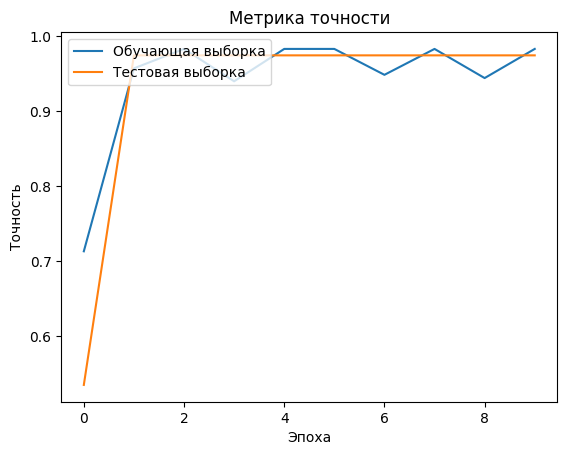

In [ ]:
# Визуализация точности
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Метрика точности')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc='upper left')
plt.show()


# Экспирименты с моделями


In [ ]:
# Создание модели
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))  # Добавление слоя Dropout
model.add(BatchNormalization())  # Добавление слоя BatchNormalization
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))  # Добавление слоя Dropout
model.add(BatchNormalization())  # Добавление слоя BatchNormalization
model.add(Flatten())  # Добавление слоя Flatten для преобразования векторов в одномерный массив
model.add(Dense(2, activation='softmax'))

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Обучение модели
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

Epoch 1/10
15/15 [==============================] - 3s 19ms/step - loss: 0.9458 - accuracy: 0.5270 - val_loss: 0.9069 - val_accuracy: 0.5345
Epoch 2/10
15/15 [==============================] - 0s 8ms/step - loss: 0.7749 - accuracy: 0.5724 - val_loss: 0.6434 - val_accuracy: 0.6466
Epoch 3/10
15/15 [==============================] - 0s 11ms/step - loss: 0.6780 - accuracy: 0.6242 - val_loss: 0.5658 - val_accuracy: 0.7759
Epoch 4/10
15/15 [==============================] - 0s 8ms/step - loss: 0.6073 - accuracy: 0.6890 - val_loss: 0.4490 - val_accuracy: 0.9052
Epoch 5/10
15/15 [==============================] - 0s 9ms/step - loss: 0.5309 - accuracy: 0.7214 - val_loss: 0.3472 - val_accuracy: 0.9741
Epoch 6/10
15/15 [==============================] - 0s 9ms/step - loss: 0.4801 - accuracy: 0.7883 - val_loss: 0.3116 - val_accuracy: 0.9741
Epoch 7/10
15/15 [==============================] - 0s 7ms/step - loss: 0.4401 - accuracy: 0.8229 - val_loss: 0.2845 - val_accuracy: 0.9741
Epoch 8/10
15/15 [

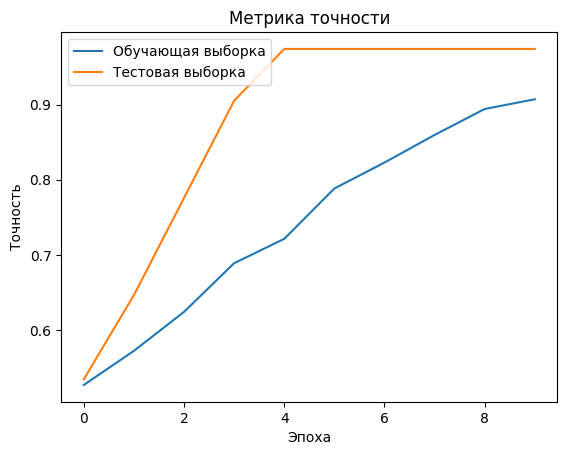

In [ ]:
# Визуализация точности
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Метрика точности')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc='upper left')
plt.show()

# Новая модель обучения


In [ ]:
# Создание модели
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))  # Добавление Dropout
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())  # Добавление BatchNormalization
model.add(Flatten())  # Преобразование в одномерный вектор
model.add(Dense(2, activation='softmax'))

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Обучение модели
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=64, validation_data=(X_test, y_test_encoded))

Epoch 1/10
8/8 [==============================] - 2s 32ms/step - loss: 0.8366 - accuracy: 0.4017 - val_loss: 0.7617 - val_accuracy: 0.5345
Epoch 2/10
8/8 [==============================] - 0s 10ms/step - loss: 0.7422 - accuracy: 0.6868 - val_loss: 0.6877 - val_accuracy: 0.5948
Epoch 3/10
8/8 [==============================] - 0s 8ms/step - loss: 0.6969 - accuracy: 0.7322 - val_loss: 0.6255 - val_accuracy: 0.8017
Epoch 4/10
8/8 [==============================] - 0s 10ms/step - loss: 0.6501 - accuracy: 0.7970 - val_loss: 0.5993 - val_accuracy: 0.8103
Epoch 5/10
8/8 [==============================] - 0s 8ms/step - loss: 0.6037 - accuracy: 0.8294 - val_loss: 0.4773 - val_accuracy: 0.9741
Epoch 6/10
8/8 [==============================] - 0s 10ms/step - loss: 0.5557 - accuracy: 0.8747 - val_loss: 0.3924 - val_accuracy: 0.9741
Epoch 7/10
8/8 [==============================] - 0s 8ms/step - loss: 0.5305 - accuracy: 0.8898 - val_loss: 0.3575 - val_accuracy: 0.9741
Epoch 8/10
8/8 [==============

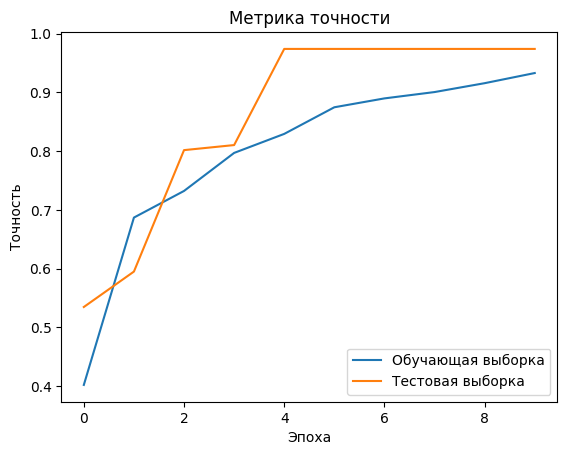

In [ ]:
# Визуализация точности
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Метрика точности')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend(['Обучающая выборка', 'Тестовая выборка'])
plt.show()

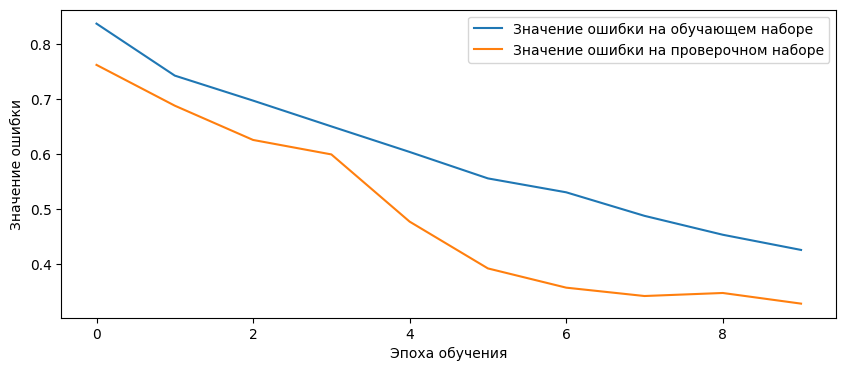

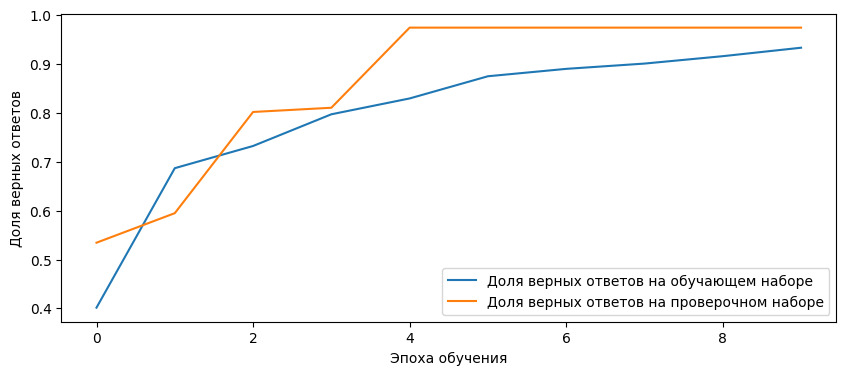

In [ ]:
# Строим график для отображения динамики ошибки работы модели
plt.figure(figsize = (10, 4))
plt.plot(history.history['loss'],
         label='Значение ошибки на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Значение ошибки на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()
plt.show()

# Строим график для отображения динамики обучения и точности предсказания сети
plt.figure(figsize = (10, 4))
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()